<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [54]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt


* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [55]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [56]:
%%time
# change the path if needed
path = '../../data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 35.2 s, sys: 339 ms, total: 35.6 s
Wall time: 34.8 s


**Check the number of rows and columns and print column names.**

In [57]:
print(flights_df.shape)
print(flights_df.columns)
print(type(flights_df))

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


**Print first 5 rows of the dataset.**

In [58]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [59]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [60]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [61]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [62]:
flights_df['UniqueCarrier'].nunique()

20

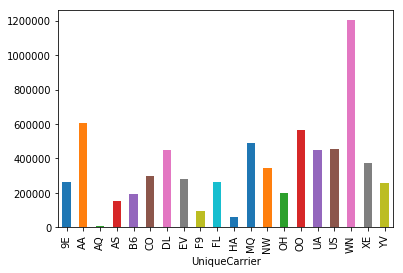

In [63]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [64]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [65]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [66]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

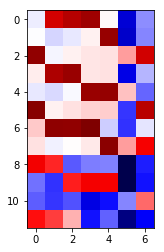

In [67]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

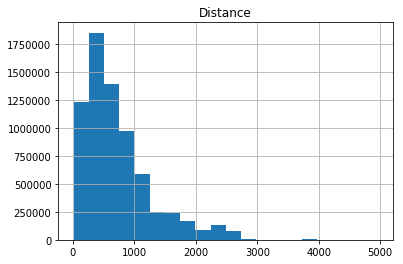

In [68]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [69]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [70]:
num_flights_by_date = flights_df.groupby('Date').size()

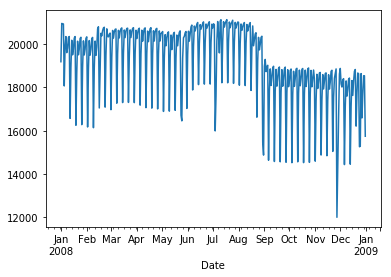

In [71]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

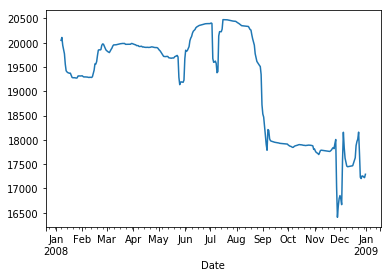

In [72]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [73]:
print(type(flights_df))

<class 'pandas.core.frame.DataFrame'>


In [74]:
flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'Date'],
      dtype='object')

In [75]:
flights = flights_df[flights_df["CancellationCode"].isnull() ]

flights = flights["UniqueCarrier"]
flights.value_counts()

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
EV     275549
FL     259448
9E     255108
YV     245711
B6     192886
OH     191145
AS     148963
F9      95459
HA      61256
AQ       7758
Name: UniqueCarrier, dtype: int64

In [76]:
flights.value_counts()[:10]

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

EV

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

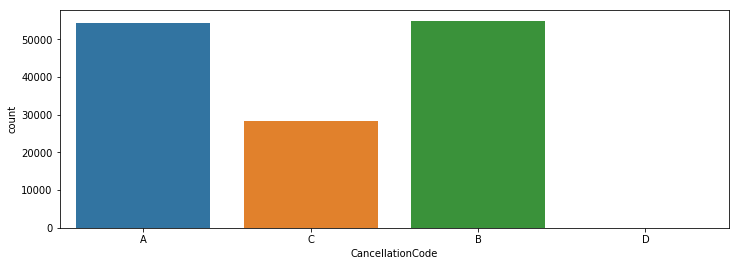

In [77]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.countplot(x='CancellationCode', data=flights_df);





In [78]:
cancelledFlights = flights_df["CancellationCode"]
cancelledFlights.value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

B

### A	Carrier
### B	Weather
### C	National Air System
### D	Security


Weather is the answer

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [79]:
mostFreqFlights = flights_df.groupby(["Origin",'Dest']).agg({'Dest': 'count'})
mostFreqFlights['Dest'].sort_values(ascending=False)

Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
HNL     OGG     12014
LAX     LAS     11773
LAS     LAX     11729
LAX     SAN     11257
SAN     LAX     11224
DCA     LGA     11102
LGA     DCA     11063
        ORD     10862
ORD     LGA     10770
HNL     LIH     10769
LAS     PHX     10626
LGA     ATL     10507
ATL     LGA     10506
LIH     HNL     10407
PHX     LAS     10337
        LAX      9992
LAX     PHX      9897
DFW     ATL      9849
ATL     DFW      9847
DAL     HOU      9790
HOU     DAL      9766
ORD     MSP      9688
ATL     MCO      9613
MCO     ATL      9611
MSP     ORD      9356
                ...  
MCI     LNK         1
        MGM         1
SGF     FSD         1
BTR     MSY         1
SFO     SJC         1
AVP     HPN         1
SJC     BFL         1
LNK     ABE         1
LMT     MFR         1
LIT     SAT         1
PSP     ONT         1
        TWF         1
ATW     CHS         1
        DSM        

In [80]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [81]:
flights = flights_df.groupby(['Origin','Dest'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'count'), ascending=False)
flights


Distance                   Cancelled
                mean        sum  count       sum
Origin Dest                                     
SFO    LAX       337  4646556.0  13788     489.0
LAX    SFO       337  4512430.0  13390     455.0
OGG    HNL       100  1238300.0  12383     246.0
LGA    BOS       185  2226475.0  12035     817.0
BOS    LGA       185  2225365.0  12029     822.0
HNL    OGG       100  1201400.0  12014     237.0
LAX    LAS       236  2778428.0  11773     212.0
LAS    LAX       236  2768044.0  11729     222.0
LAX    SAN       109  1227013.0  11257     128.0
SAN    LAX       109  1223416.0  11224     175.0
DCA    LGA       214  2375828.0  11102     768.0
LGA    DCA       214  2367482.0  11063     752.0
       ORD       733  7961846.0  10862     852.0
ORD    LGA       733  7894410.0  10770     826.0
HNL    LIH       102  1098438.0  10769      69.0
LAS    PHX       256  2720256.0  10626     320.0
LGA    ATL       761  7995827.0  10507     435.0
ATL    LGA       761  7995066.0  10506     410.0
LIH    HNL       102  1061514.0  10407      76.0
PHX    LAS       256  2646272.0  10337     223.0
       LAX       370  3697040.0   9992     153.0
LAX    PHX       370  3661890.0   9897     183.0
DFW    ATL       732  7209468.0   9849     205.0
ATL    DFW       732  7208004.0   9847     199.0
DAL    HOU       239  2339810.0   9790     440.0
HOU    DAL       239  2334074.0   9766     507.0
ORD    MSP       334  3235792.0   9688     396.0
ATL    MCO       403  3874039.0   9613      32.0
MCO    ATL       403  3873233.0   9611      51.0
MSP    ORD       334  3124904.0   9356     388.0
...              ...        ...    ...       ...
ABE    BHM       792      792.0      1       0.0
RNO    BUR       374      374.0      1       0.0
ILM    RDU       122      122.0      1       0.0
BZN    IDA       163      163.0      1       0.0
       BTM        65       65.0      1       0.0
SNA    SAN        76       76.0      1       0.0
MCO    LIT       775      775.0      1       0.0
PIA    LNK       371      371.0      1       0.0
PSP    GJT       575      575.0      1       0.0
PIT    GRB       488      488.0      1       0.0
GRB    DEN       905      905.0      1       0.0
IND    XNA       498      498.0      1       0.0
PIT    SJU      1739     1739.0      1       0.0
GRB    DSM       346      346.0      1       0.0
PLN    DCA       611      611.0      1       0.0
GRB    GTF      1133     1133.0      1       0.0
PSC    TWF       347      347.0      1       0.0
PSP    FAT       273      273.0      1       0.0
       ONT        65       65.0      1       0.0
CHS    SAV        86       86.0      1       0.0
MCO    PBI       142      142.0      1       0.0
GRB    SDF       453      453.0      1       0.0
PSP    TWF       607      607.0      1       0.0
PVD    BDL        66       66.0      1       0.0
IND    PIT       325      325.0      1       0.0
CID    MKE       208      208.0      1       0.0
       DSM       104      104.0      1       1.0
CIC    MRY       221      221.0      1       0.0
       FAT       239      239.0      1       0.0
ROA    CLT       155      155.0      1       0.0

[5366 rows x 4 columns]

In [82]:
print("Top Ten Flights")
(flights.Distance['count'] - flights.Cancelled['sum'])[:5]

Top Ten Flights


Origin  Dest
SFO     LAX     13299.0
LAX     SFO     12935.0
OGG     HNL     12137.0
LGA     BOS     11218.0
BOS     LGA     11207.0
dtype: float64

### SFO -	LAX	
Sanfrancisco to los angeles


**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [83]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [84]:
#Remove all flights with no delays
delayed_flights = flights_df[flights_df['DepDelay'] > 0]
delayed_flights

delayed_flights_grouped = delayed_flights.groupby(['Origin','Dest'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'count'), ascending=False)

delayed_flights_grouped[:5]

Distance                  Cancelled
                mean        sum count       sum
Origin Dest                                    
LAX    SFO       337  2107261.0  6253         0
DAL    HOU       239  1372338.0  5742         0
SFO    LAX       337  1793514.0  5322         0
ORD    LGA       733  3892963.0  5311         4
HOU    DAL       239  1263832.0  5288         0

In [85]:
type(delayed_flights_grouped)
topFiveDelayedRoutes = delayed_flights_grouped[:5].index.tolist()
topFiveDelayedRoutes

[('LAX', 'SFO'),
 ('DAL', 'HOU'),
 ('SFO', 'LAX'),
 ('ORD', 'LGA'),
 ('HOU', 'DAL')]

In [86]:
delayed_flights[(delayed_flights['Origin'] == 'LAX') & (delayed_flights['Dest'] == 'SFO') & (delayed_flights['WeatherDelay'] > 0)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
402,2008,1,3,4,2008.0,WN,646,129.0,123.0,LAX,SFO,337,0,NaN,0.0,24.0,6.0,0.0,99.0,2008-01-03
3841,2008,1,4,5,1440.0,WN,680,236.0,230.0,LAX,SFO,337,0,NaN,0.0,202.0,6.0,0.0,28.0,2008-01-04
7014,2008,1,5,6,1604.0,WN,656,93.0,94.0,LAX,SFO,337,0,NaN,0.0,93.0,0.0,0.0,0.0,2008-01-05
7016,2008,1,5,6,1533.0,WN,776,156.0,168.0,LAX,SFO,337,0,NaN,0.0,150.0,0.0,0.0,6.0,2008-01-05
9998,2008,1,6,7,1549.0,WN,656,76.0,79.0,LAX,SFO,337,0,NaN,0.0,48.0,0.0,0.0,28.0,2008-01-06
16748,2008,1,8,2,2220.0,WN,593,148.0,146.0,LAX,SFO,337,0,NaN,0.0,29.0,2.0,0.0,117.0,2008-01-08
27062,2008,1,11,5,1207.0,WN,680,79.0,77.0,LAX,SFO,337,0,NaN,0.0,77.0,2.0,0.0,0.0,2008-01-11
59078,2008,1,21,1,1528.0,WN,918,89.0,93.0,LAX,SFO,337,0,NaN,0.0,89.0,0.0,0.0,0.0,2008-01-21
65935,2008,1,23,3,2232.0,WN,619,56.0,76.0,LAX,SFO,337,0,NaN,0.0,16.0,0.0,0.0,40.0,2008-01-23
78583,2008,1,27,7,1527.0,WN,918,95.0,92.0,LAX,SFO,337,0,NaN,0.0,91.0,3.0,0.0,1.0,2008-01-27


In [87]:
delayedByWeather = 0

for index in topFiveDelayedRoutes:
    delayedByWeather += len(delayed_flights[(delayed_flights['Origin'] == index[0]) & (delayed_flights['Dest'] == index[1]) & (delayed_flights['WeatherDelay'] > 0)])
    
delayedByWeather
    

668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [88]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [89]:
flightTimeInterval = flights_df['DepTime'].dropna()
flightTimeInterval.head()

0    2003.0
1     754.0
2     628.0
3     926.0
4    1829.0
Name: DepTime, dtype: float16

In [90]:
flightTimeIntervalHours = np.round(flightTimeInterval/100,0)
type(flightTimeIntervalHours)

pandas.core.series.Series

In [91]:
flightTimeIntervalHoursDropped = flightTimeIntervalHours[flightTimeIntervalHours <= 23]
flightTimeIntervalHoursDropped.head()

0    20.0
1     8.0
2     6.0
3     9.0
4    18.0
Name: DepTime, dtype: float16

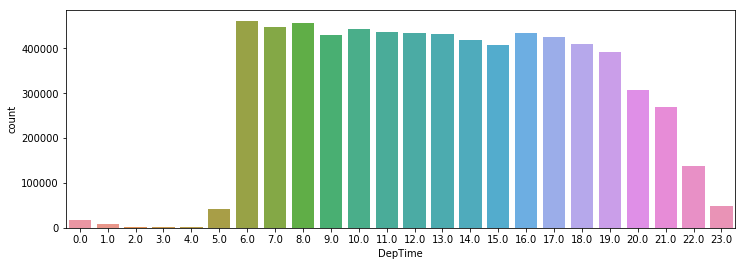

In [92]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.countplot(x=flightTimeIntervalHoursDropped);

 Flights are uniformly distributed within time interval [0-23].
 
 the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

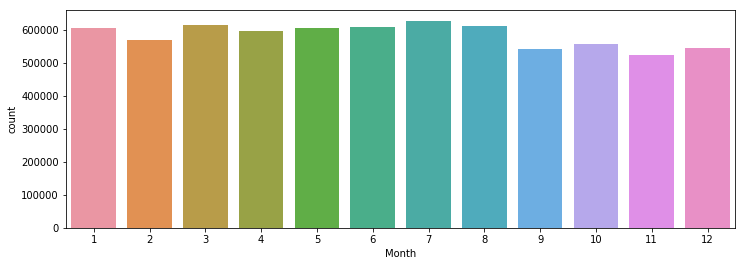

In [93]:
monthly = flights_df.groupby(['Month'])
flightTimeInterval = monthly['Month'].apply(pd.Series)
flightTimeIntervalHours = np.round(flightTimeInterval,0)

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.countplot(x=flightTimeIntervalHours);

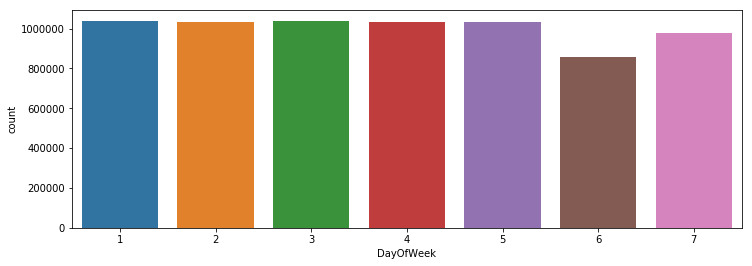

In [94]:
weekly = flights_df.groupby(['DayOfWeek'])
flightTimeInterval = weekly['DayOfWeek'].apply(pd.Series)
flightTimeIntervalHours = np.round(flightTimeInterval,0)

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.countplot(x=flightTimeIntervalHours);


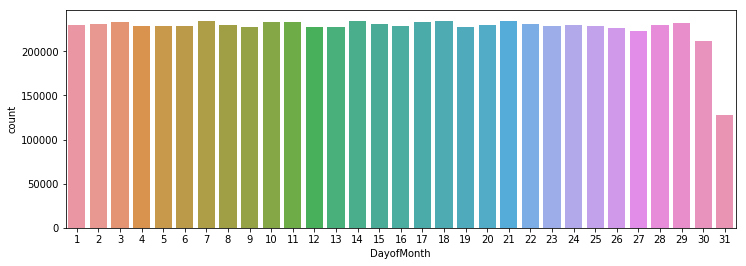

In [95]:
daily = flights_df.groupby(['DayofMonth'])

flightTimeInterval = daily['DayofMonth'].apply(pd.Series)
flightTimeIntervalHours = np.round(flightTimeInterval,0)

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.countplot(x=flightTimeIntervalHours);

The number of flights during weekends is less than during weekdays (working days).
There are less flights during winter than during summer

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [96]:
cancelled = flights_df[flights_df['CancellationCode'].notna()]
cancelled = cancelled.groupby(['Month','CancellationCode']).size()

cancelled


Month  CancellationCode
1      A                    6635
       B                    6711
       C                    3962
2      A                    6090
       B                   10034
       C                    4470
       D                       2
3      A                    6038
       B                    7520
       C                    2621
       D                       4
4      A                    7312
       B                    1479
       C                    1564
5      A                    3157
       B                    1461
       C                    1608
       D                       3
6      A                    4251
       B                    3448
       C                    3232
7      A                    5292
       B                    2612
       C                    2694
8      A                    3852
       B                    3582
       C                    2401
9      A                    2246
       B                    6478
       C           

In [97]:
cancelledUnstacked = cancelled.unstack()
cancelledUnstacked.T

Month,1,2,3,4,5,6,7,8,9,10,11,12
CancellationCode,,,,,,,,,,,,
A,6635.0,6090.0,6038.0,7312.0,3157.0,4251.0,5292.0,3852.0,2246.0,2097.0,2510.0,4850.0
B,6711.0,10034.0,7520.0,1479.0,1461.0,3448.0,2612.0,3582.0,6478.0,600.0,937.0,10042.0
C,3962.0,4470.0,2621.0,1564.0,1608.0,3232.0,2694.0,2401.0,1188.0,552.0,1009.0,2887.0
D,NaN,2.0,4.0,NaN,3.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN


In [98]:
cancelledUnstacked.T.columns

UInt64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='uint64', name='Month')

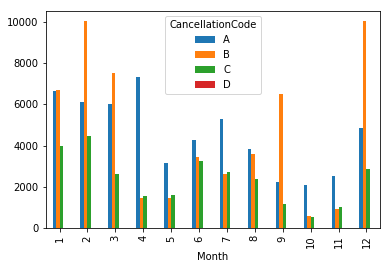

In [99]:
cancelledUnstacked.plot(kind='bar')

December has the highest rate of cancellations due to weather.
April's top cancellation reason is carriers.

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

April

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [100]:
flights_df[(flights_df['Month'] == 4) & (flights_df['CancellationCode'] == 'A')].groupby('UniqueCarrier').count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
UniqueCarrier,,,,,,,,,,,,,,,,,,,
9E,391,391,391,391,0,391,0,0,391,391,391,391,391,0,0,0,0,0,391
AA,3696,3696,3696,3696,0,3696,0,0,3696,3696,3696,3696,3696,0,0,0,0,0,3696
AS,135,135,135,135,0,135,0,0,135,135,135,135,135,0,0,0,0,0,135
B6,43,43,43,43,0,43,0,0,43,43,43,43,43,0,0,0,0,0,43
CO,50,50,50,50,0,50,0,0,50,50,50,50,50,0,0,0,0,0,50
DL,226,226,226,226,0,226,0,0,226,226,226,226,226,0,0,0,0,0,226
EV,29,29,29,29,0,29,0,0,29,29,29,29,29,0,0,0,0,0,29
F9,7,7,7,7,0,7,0,0,7,7,7,7,7,0,0,0,0,0,7
FL,81,81,81,81,0,81,0,0,81,81,81,81,81,0,0,0,0,0,81


AA

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [101]:
ArrAndDepDelayFlights = flights_df[flights_df['ArrDelay'] > 0]
ArrAndDepDelayFlights = ArrAndDepDelayFlights[ArrAndDepDelayFlights['DepDelay'] > 0]
quantile = ArrAndDepDelayFlights.quantile(.95)


ArrAndDepDelayFlights = ArrAndDepDelayFlights[ArrAndDepDelayFlights['ArrDelay'] < quantile.ArrDelay]
ArrAndDepDelayFlights = ArrAndDepDelayFlights[ArrAndDepDelayFlights['DepDelay'] < quantile.DepDelay]
ArrAndDepDelayFlights

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,JAX,688,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,LAS,1591,0,NaN,10.0,0.0,0.0,0.0,47.0,2008-01-03
8,2008,1,3,4,617.0,WN,11,2.0,2.0,IND,MCI,451,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
10,2008,1,3,4,706.0,WN,100,1.0,6.0,IND,MCO,828,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
11,2008,1,3,4,1644.0,WN,1333,80.0,94.0,IND,MCO,828,0,NaN,8.0,0.0,0.0,0.0,72.0,2008-01-03
15,2008,1,3,4,1029.0,WN,2272,11.0,9.0,IND,MDW,162,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
16,2008,1,3,4,1452.0,WN,675,15.0,27.0,IND,PHX,1489,0,NaN,3.0,0.0,0.0,0.0,12.0,2008-01-03


In [ ]:
ArrDelayFlights.groupby('UniqueCarrier').agg({'ArrDelay':np.median,'DepDelay':np.median})

AQ